### OUMAZIZ Thiziri

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [22]:
def computeFT(I):
    """ Array -> Array[complex] """
    F = fft2(I)
    return F
If=computeFT(son)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    module =np.abs(If)
    centered_module = fftshift(If)
    return centered_module

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    log_module = np.log(1+np.abs(If))
    cent_log = fftshift(log_module)
    return cent_log
#print(toVisualizeLogFT(If))
        
  
 



2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

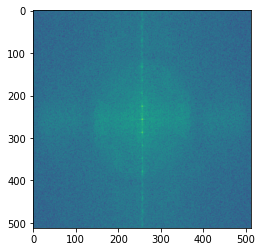

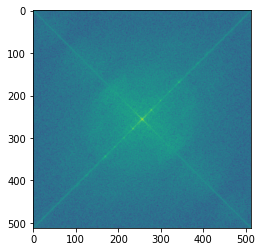

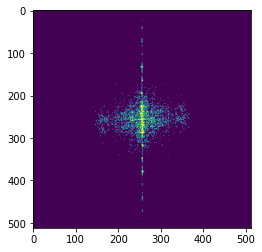

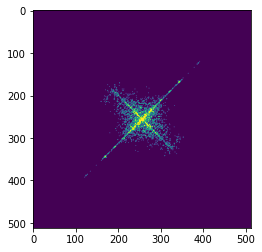

In [4]:
def thresholdImage(I,s):
    M = I.copy()
    M[M<s] = 0
    M[M>=s]= 255
    return M
    
import matplotlib.pyplot as plt

If1=computeFT(son)
If2=computeFT(sonrot)
Im1 = toVisualizeLogFT(If1)
Im2 = toVisualizeLogFT(If2)
plt.imshow(Im1)
plt.show()
plt.imshow(Im2)
plt.show()

Im1_thresh = thresholdImage(toVisualizeFT(If1),1e5)
Im2_thresh = thresholdImage(toVisualizeFT(If2),1e5)
plt.imshow(Im1_thresh)
plt.show()
plt.imshow(Im2_thresh)
plt.show()
# your code below

 3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Nous pouvons voir d'après le module de la TF seuillé qu'une rotation d'un angle θ dans le domaine spatial implique une rotation du même angle dans le domaine fréquenciel. De plus, la réponse en fréquence fournit des informations sur l'orientation des structures de l'image.



4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [5]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    M = alpha*I1 + (1-alpha)*I2
    return M


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

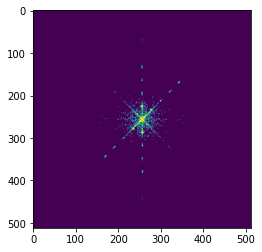

In [8]:
blended_image = blend(son,sonrot,alpha=0.5)
If_b_image = computeFT(blended_image)
plt.imshow(thresholdImage(toVisualizeFT(If_b_image),1e5))

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

Nous pouvons voir que le spectre obtenu est une combinaison pondérée des deux spectres obtenus precedemment, ce résultat démontre la propriété de linéarité de la transformée de Fourier. Dans ce cas, 𝛼 est un paramètre de pondération, si 𝛼 est plus proche de 1, la transformée de Fourier résultante sera dominée par les composantes de fréquence de I1, et si 𝛼 est plus proche de 0, elle sera dominée par les composantes de fréquence de I2. Si α = 0.5, cela signifie que c'est une fusion équilibrée des informations de fréquence des deux images.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [9]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))



####### your code below

def rectifyOrientation(I) :

    If_rot = toVisualizeFT(computeFT(I))
    If_rot_thresh = thresholdImage (If_rot,3e5)
    print(mainOrientation(If_rot_thresh)[1])
    angle = mainOrientation(If_rot_thresh)[1]
    result = rotateImage(I,-angle)
    plt.imshow(result)



8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

-45.0


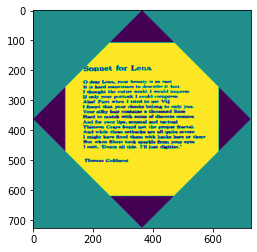

In [10]:
rectifyOrientation(sonrot)

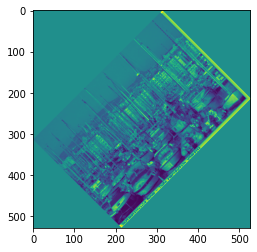

In [17]:
port_rot = rotateImage (np.array(Image.open('img\port.jpg')),45)
plt.imshow(port_rot)

45.0


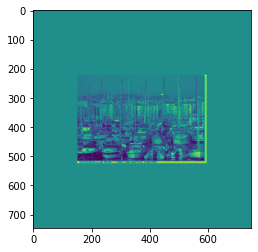

In [18]:
rectifyOrientation(port_rot)